### Objectives

Working on a real-world dataset to understand customer churn and apply statistical and probabilistic concepts to explore data, derive insights, and build a churn prediction model.

### Learning Outcome

1. Master basic and advanced statistical concepts.
2. Use probability distributions and inferential statistics to analyze data.
3. Explore the role of probability in ML tasks like classification.
4. Build and evaluate a predictive ML model using the insights derived.

### Dataset

Dataset: Customer Churn Dataset, generated using synthetic data

* Contains customer information, subscription details, and churn status.
* Includes categorical (e.g., gender, contract type) and numerical features (e.g., monthly charges, tenure).

### Project Workflow

1. Problem Understanding and Dataset Overview
2. Data Exploration and Cleaning
3. Exploratory Data Analysis (EDA)
4. Statistical and Probabilistic Analysis
5. Feature Engineering
6. Machine Learning Model
7.  Interpretation and Reporting

### Expected Deliverables
1. Cleaned dataset.
2. Statistical analysis report (hypothesis tests, probabilities).
3. Visualizations from EDA and statistical testing.
4. Machine learning model with performance metrics.
5. Final presentation/report summarizing findings and recommendations.


#### Importing Libraries and Dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import shap
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
data = pd.read_csv('customer_data.csv')
#creating a copy
df = data.copy()

In [3]:
# A look at the data
df.head()

,CustomerID,Gender,Age,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Male,24,0,Yes,Yes,8,No,No,Fiber optic,...,No,No internet service,No,No internet service,Month-to-month,Yes,Bank transfer,45.61,364.88,Yes
1,2,Female,23,0,No,No,24,Yes,No,Fiber optic,...,No,No,Yes,Yes,Two year,Yes,Bank transfer,83.43,2002.32,No
2,3,Male,18,0,No,Yes,70,Yes,No,Fiber optic,...,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card,75.81,5306.70,No
3,4,Male,83,1,No,No,68,Yes,Yes,DSL,...,No,No,No,Yes,One year,Yes,Mailed check,83.89,5704.52,No
4,5,Male,34,0,No,No,44,No,Yes,No,...,Yes,Yes,Yes,No,Month-to-month,Yes,Mailed check,99.14,4362.16,No


In [4]:
#About the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        50000 non-null  int64  
 1   Gender            50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   SeniorCitizen     50000 non-null  int64  
 4   Partner           50000 non-null  object 
 5   Dependents        50000 non-null  object 
 6   Tenure            50000 non-null  int64  
 7   PhoneService      50000 non-null  object 
 8   MultipleLines     50000 non-null  object 
 9   InternetService   50000 non-null  object 
 10  OnlineSecurity    50000 non-null  object 
 11  OnlineBackup      50000 non-null  object 
 12  DeviceProtection  50000 non-null  object 
 13  TechSupport       50000 non-null  object 
 14  StreamingTV       50000 non-null  object 
 15  StreamingMovies   50000 non-null  object 
 16  Contract          50000 non-null  object

In [5]:
#Size of the data
df.shape

(50000, 22)

In [6]:
# Summary of the data
df.describe()

,CustomerID,Age,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,45.891240,0.147800,35.474500,70.074590,2485.260244
std,14433.901067,17.991586,0.354905,20.825157,28.866871,1881.100159
min,1.000000,18.000000,0.000000,0.000000,20.010000,0.000000
25%,12500.750000,31.000000,0.000000,17.000000,45.200000,969.775000
50%,25000.500000,45.000000,0.000000,36.000000,69.970000,2048.840000
75%,37500.250000,58.000000,0.000000,53.000000,95.170000,3659.612500
max,50000.000000,89.000000,1.000000,71.000000,120.000000,8516.450000


#### Data Cleaning

Explanation: Missing values can significantly impact the results of statistical tests and machine learning models. Statistical tests may give incorrect results if they encounter missing data, while machine learning models might fail to train or produce biased predictions. Imputing or removing these values ensures the data is consistent and reliable.

In [7]:
# Handling missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
CustomerID          0
Gender              0
Age                 0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
# Dropping or imputing missing values (example assumes numerical imputation for simplicity)
# df.fillna(data.median(), inplace=True)

In [9]:
# Checking for duplicates
df.drop_duplicates(inplace=True)

#### Exploratory Data Analysis (EDA)

#### Univariate Analysis

Explanation: Univariate analysis focuses on examining one variable at a time to understand its distribution, central tendency, and spread. It helps identify patterns, potential outliers, or issues such as skewness that might need correction during data preprocessing.

In [10]:
# Plot distributions of numerical features
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

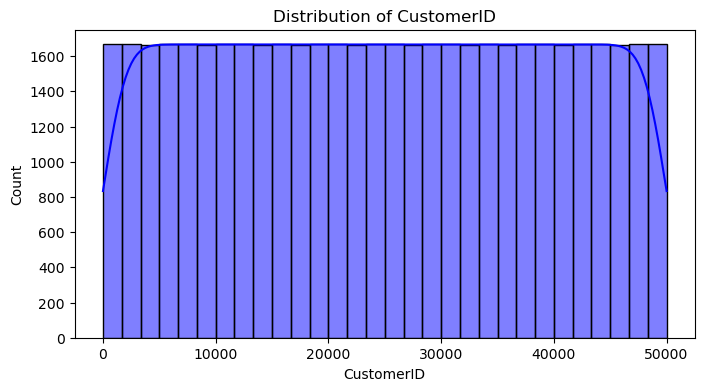

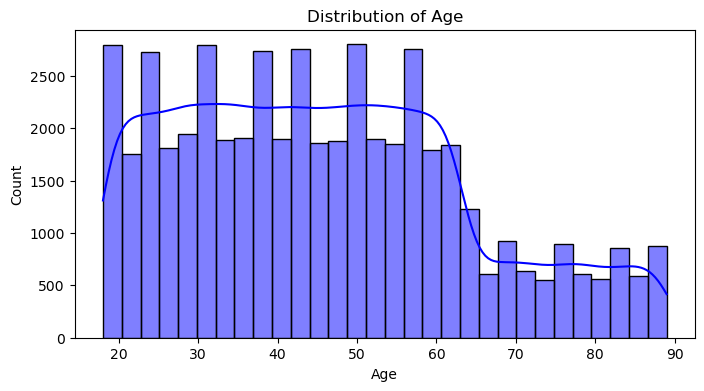

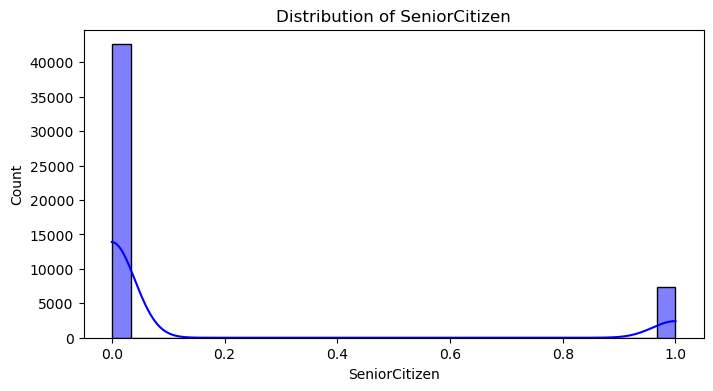

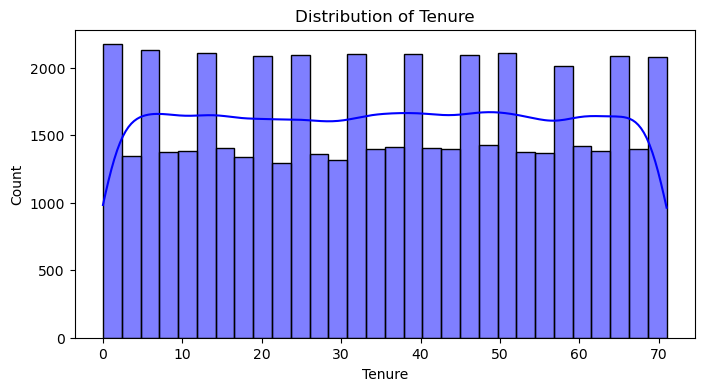

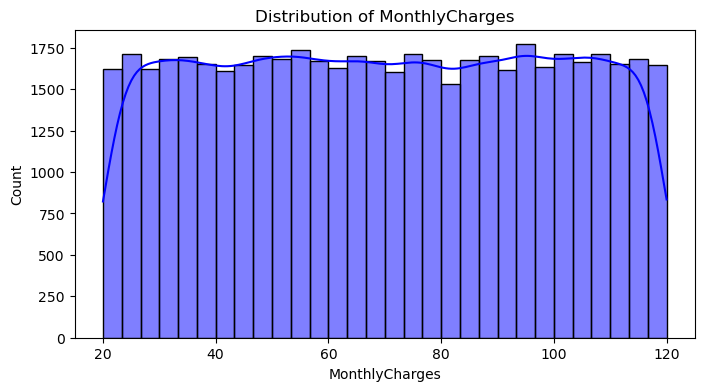

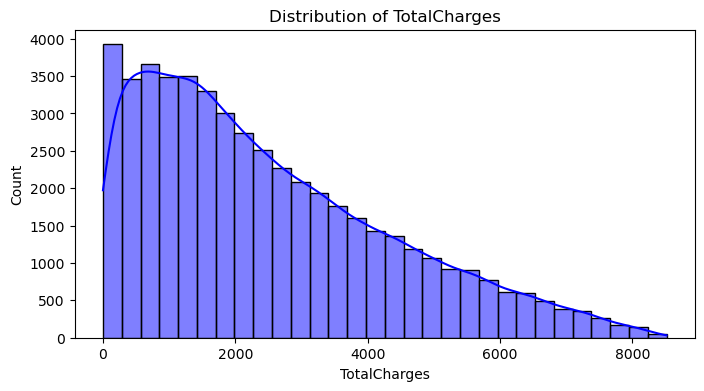

In [11]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

#### Bivariate Analysis

Explanation: Understanding correlations helps in feature selection by identifying highly correlated features, which might be redundant. Additionally, it helps in avoiding multicollinearity, which can negatively impact model performance by making coefficient estimates unreliable.

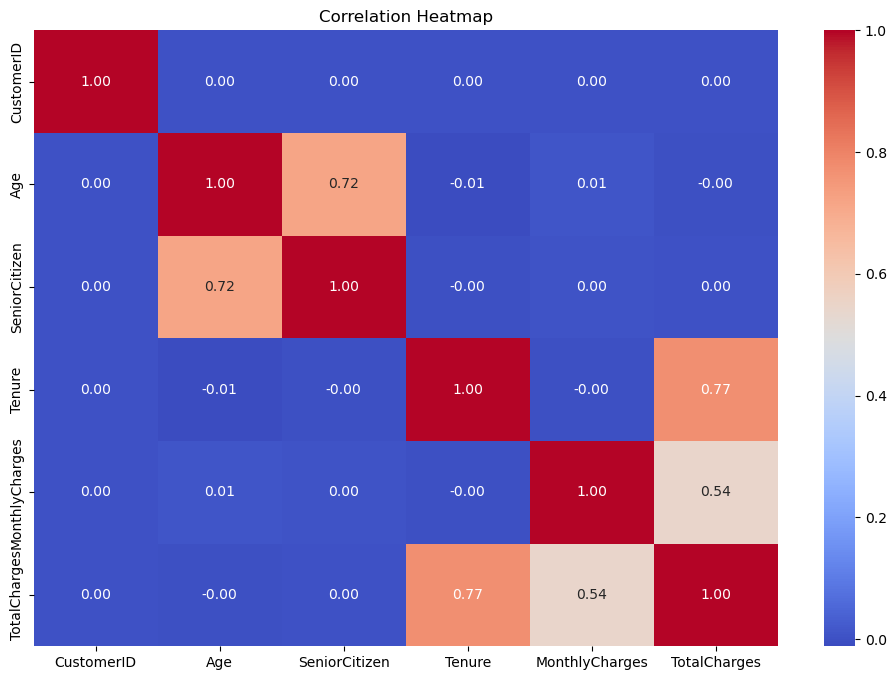

In [12]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation = data[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
# Categorical feature analysis
categorical_cols = data.select_dtypes(include=['object']).columns

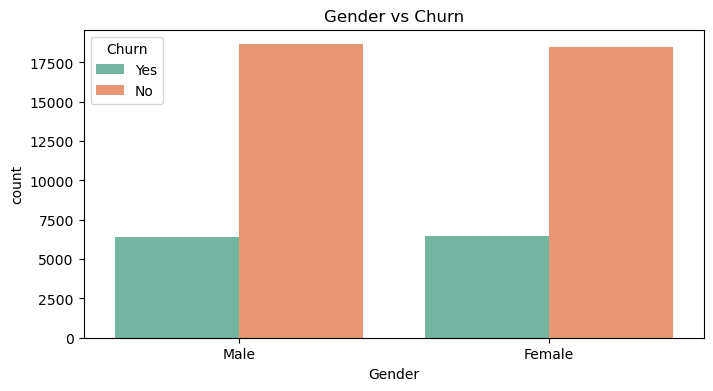

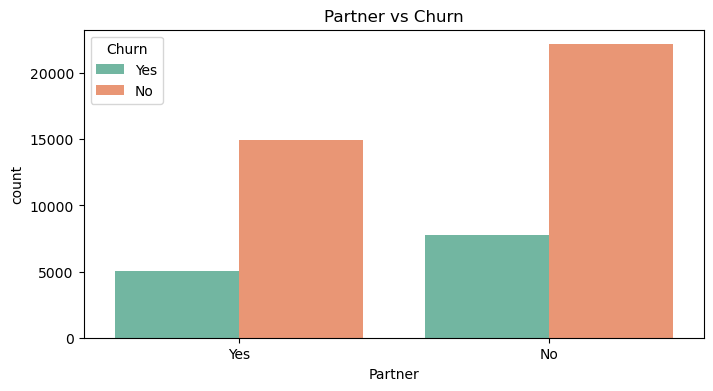

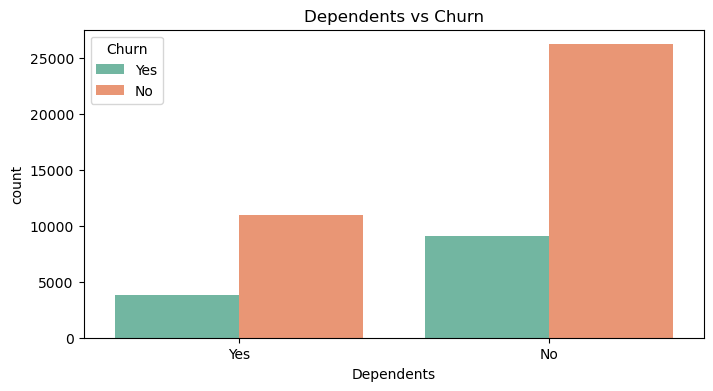

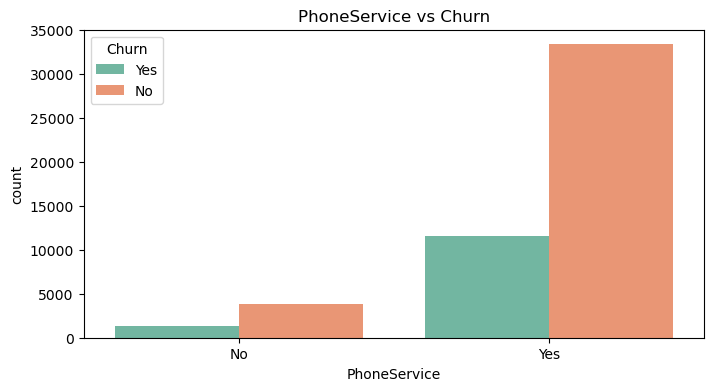

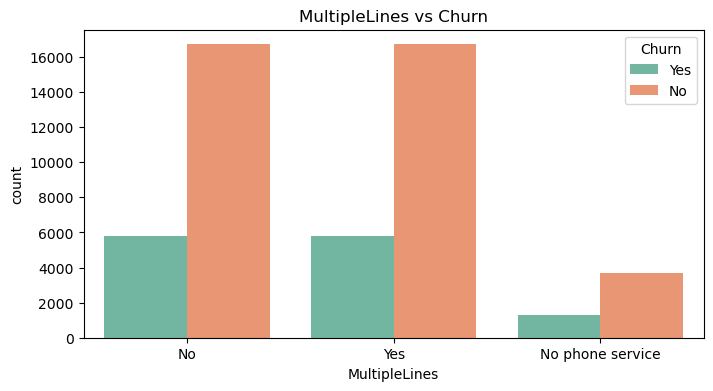

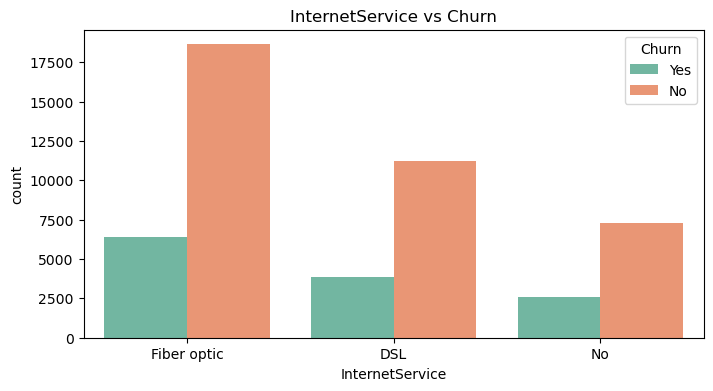

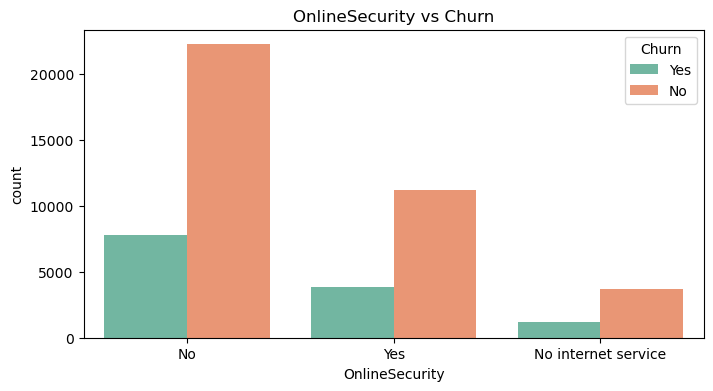

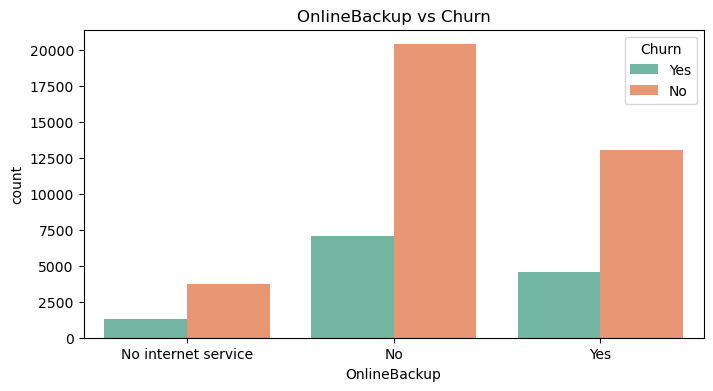

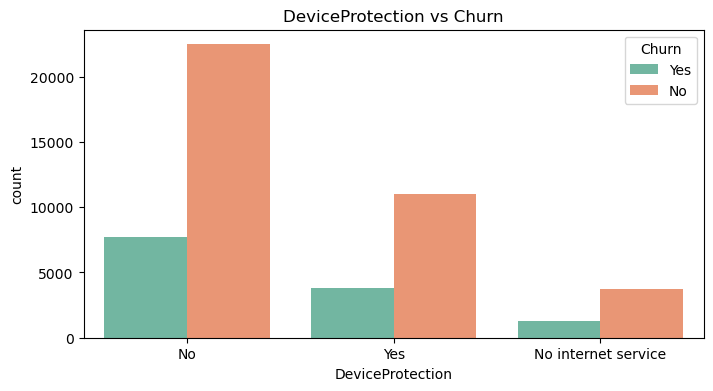

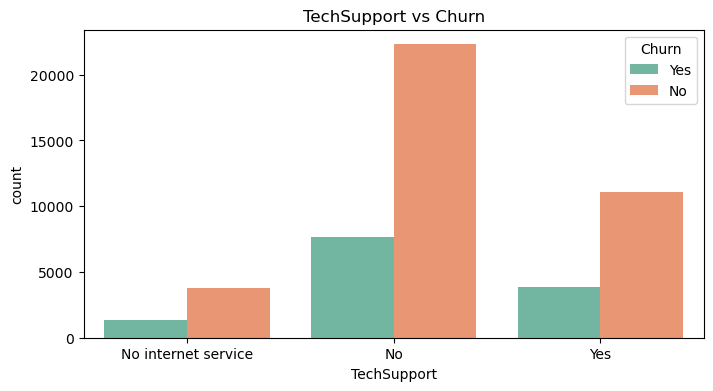

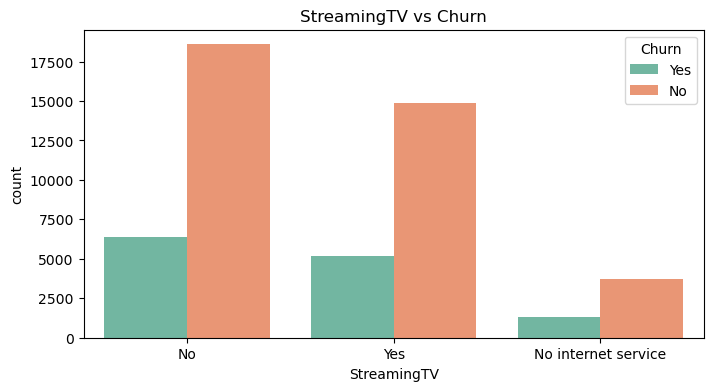

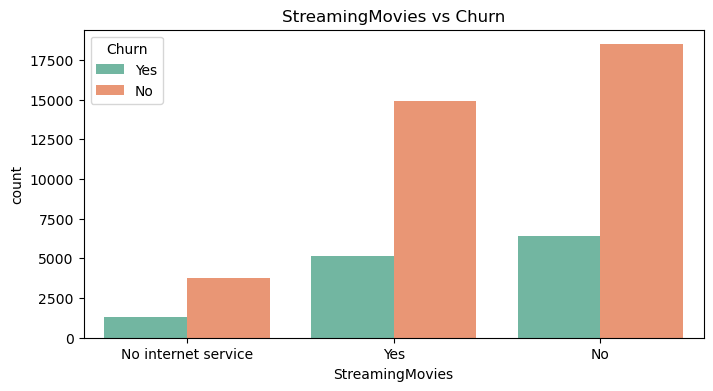

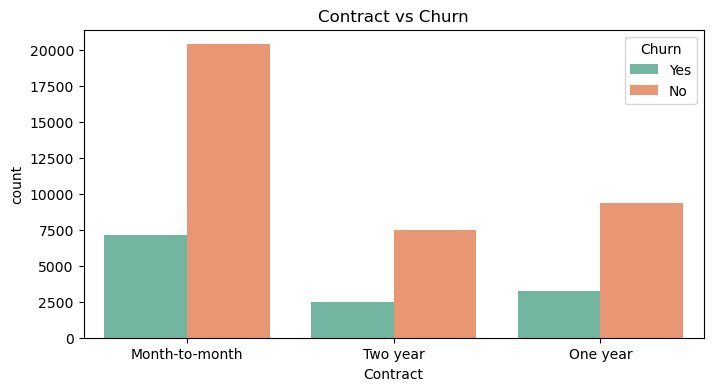

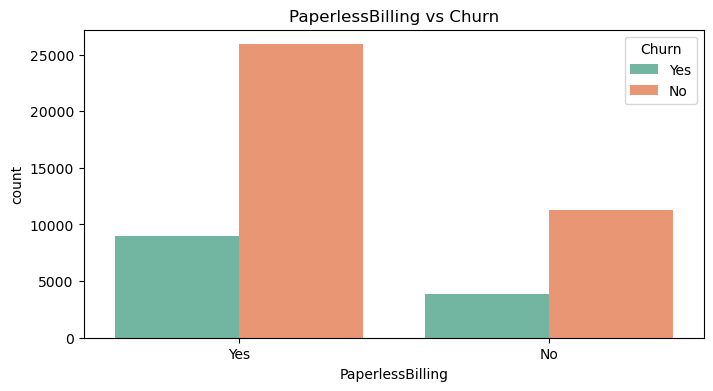

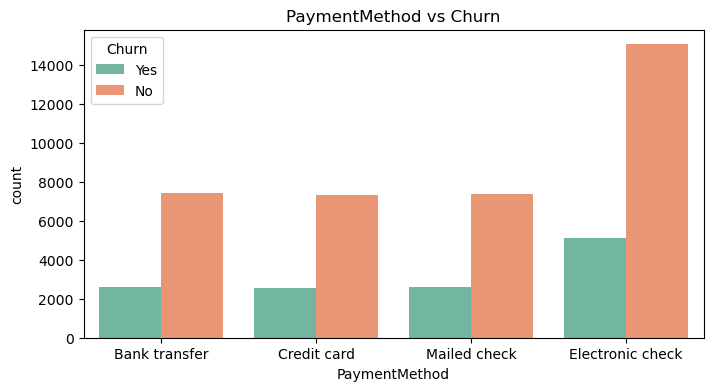

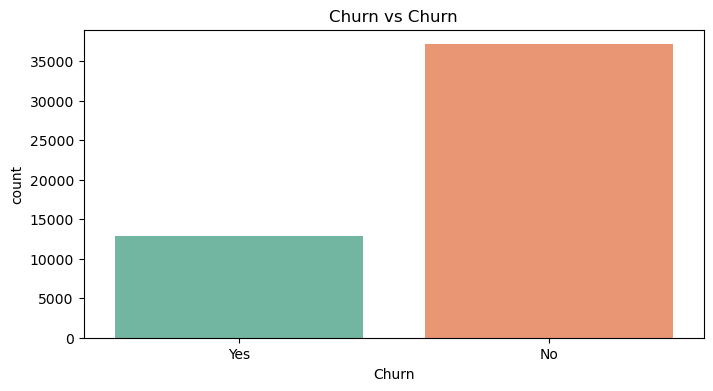

In [14]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[col], hue=data['Churn'], palette="Set2")
    plt.title(f'{col} vs Churn')
    plt.show()

#### Statistical Analysis

In [15]:
# Hypothesis Testing: Example - Are monthly charges significantly different for churned vs non-churned customers?
churned = data[data['Churn'] == 'Yes']['MonthlyCharges']
not_churned = data[data['Churn'] == 'No']['MonthlyCharges']

Explanation: A t-test is used to compare the means of two groups to determine if they are significantly different from each other. In this case, it helps assess whether churned customers tend to have higher or lower monthly charges compared to non-churned customers. A significant result may indicate a relationship between pricing and customer retention.

In [16]:
# T-test
t_stat, p_val = stats.ttest_ind(churned, not_churned)
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

T-Statistic: -2.5721779429758316, P-Value: 0.010108953058830805


In [17]:
# Confidence Intervals
def compute_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    se = stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean - h, mean + h

In [18]:
ci_churned = compute_confidence_interval(churned)
print(f"95% Confidence Interval for Churned Customers' Monthly Charges: {ci_churned}")

95% Confidence Interval for Churned Customers' Monthly Charges: (69.01243018430407, 70.00843268883025)


In [19]:
# Chi-Square Test: Example - Relationship between contract type and churn
contingency_table = pd.crosstab(data['Contract'], data['Churn'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, P-Value: {p}")

Chi-Square Statistic: 3.009362690336761, P-Value: 0.22208805198844753


Explanation: The Chi-Square test is used for categorical variables to determine if there is a significant association between them. In this case, it helps assess whether contract type and churn are related. A significant p-value suggests that contract type might influence customer churn behavior.

#### Probability Analysis

Explanation: Calculating conditional probabilities helps in understanding customer behavior patterns by revealing how likely an event (e.g., churn) is given certain conditions (e.g., contract type). This information can be used to develop targeted retention strategies, such as offering better plans to customers who are more likely to churn based on their contract type.



In [20]:
# Conditional Probability: Example - P(Churn | Contract Type)
contract_churn = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print(contract_churn)

Churn                 No       Yes
Contract                          
Month-to-month  0.741369  0.258631
One year        0.740335  0.259665
Two year        0.749472  0.250528


#### Feature Engineering

In [21]:
# Encoding categorical features
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

Explanation: Scaling numerical features ensures that all features contribute equally to the machine learning model, preventing models like logistic regression and neural networks from being biased toward larger magnitude features. It also helps gradient-based algorithms converge faster.

In [22]:
# Feature Scaling
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [23]:
# Splitting data
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Machine Learning Model

Explanation: Logistic Regression is suitable for this binary classification problem because it models the probability of an event occurring as a function of input features. It provides interpretable coefficients and performs well when features have a linear relationship with the log-odds of the target variable.

In [24]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [28]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7420    0]
 [2580    0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      7420
           1       0.00      0.00      0.00      2580

    accuracy                           0.74     10000
   macro avg       0.37      0.50      0.43     10000
weighted avg       0.55      0.74      0.63     10000



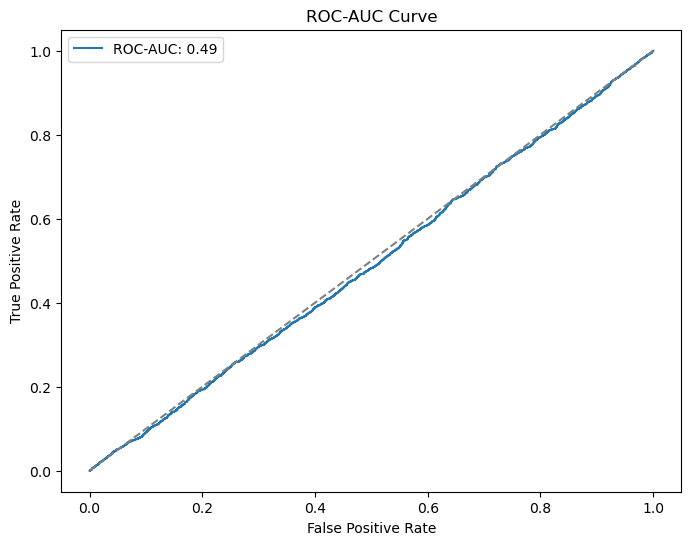

In [29]:
# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

#### Explainability with SHAP

Explanation: SHAP values help interpret model predictions by quantifying the contribution of each feature to an individual prediction. This allows us to understand which factors are most influential in predicting churn, making the model more transparent and actionable for business decision-making.


In [30]:
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

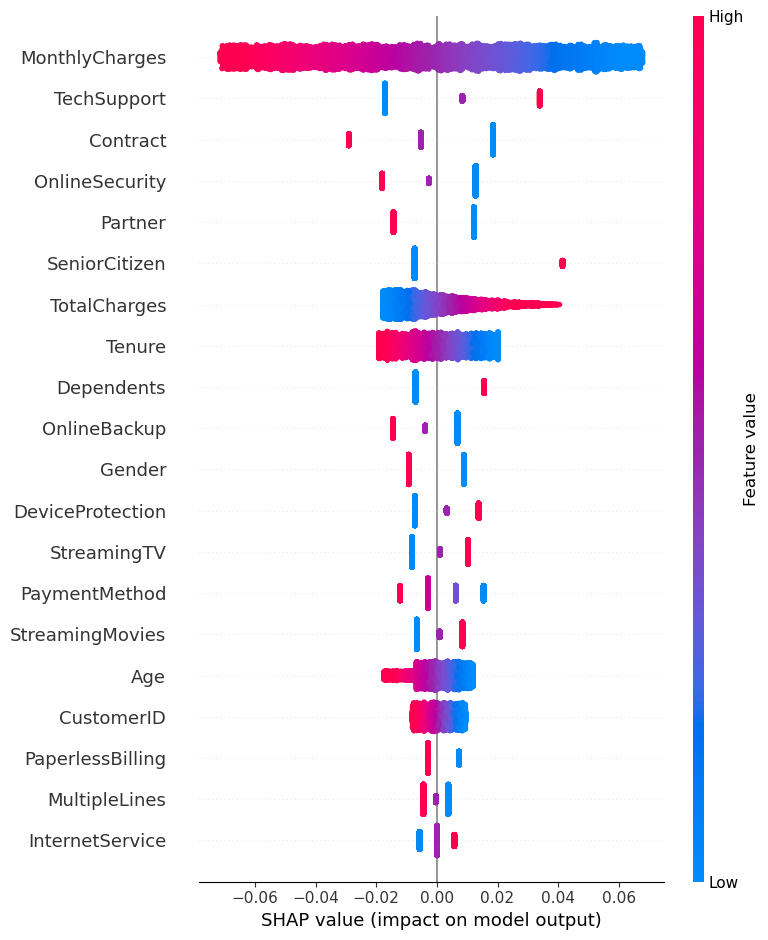

In [31]:
# Summary Plot
shap.summary_plot(shap_values, X_test)